In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = 'C:\GITHUB COLLECTIONS\ML-Purchasing-Capabilities-of-a-Customer\Datasets\Purchasing_power_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/PurchasingPowerDataset/Purchasing_power_dataset.csv'
df = pd.read_csv(file_path)


In [4]:
df.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,CustomerSegment,EstimatedYearlySpending,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle
0,F,17819.05,25.0,1,30,25.000,59,25469.05,685.35,Middle Balance,300.0,17519.05,Surplus,0.016667,0.2,0.000018,0.066672,High Spender
1,F,17874.44,459.0,1,28,459.000,59,158328.44,38.86,Middle Balance,5508.0,12366.44,Surplus,0.016667,0.2,0.000333,0.066766,High Spender
2,F,866503.21,2060.0,5,22,412.000,59,992575.21,420.43,High Balance,4944.0,861559.21,Surplus,0.016667,1.0,0.000299,0.306756,Low Spender
3,F,6714.43,1762.5,4,17,440.625,59,141545.68,3.81,Middle Balance,5287.5,1426.93,Surplus,0.016667,0.8,0.000319,0.246762,Low Spender
4,F,53609.20,676.0,5,22,135.200,59,94980.40,79.19,High Balance,1622.4,51986.80,Surplus,0.016667,1.0,0.000098,0.306696,Low Spender


In [5]:
df = df.drop('CustomerSegment' , axis = 1)

In [6]:
df.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,EstimatedYearlySpending,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle
0,F,17819.05,25.0,1,30,25.000,59,25469.05,685.35,300.0,17519.05,Surplus,0.016667,0.2,0.000018,0.066672,High Spender
1,F,17874.44,459.0,1,28,459.000,59,158328.44,38.86,5508.0,12366.44,Surplus,0.016667,0.2,0.000333,0.066766,High Spender
2,F,866503.21,2060.0,5,22,412.000,59,992575.21,420.43,4944.0,861559.21,Surplus,0.016667,1.0,0.000299,0.306756,Low Spender
3,F,6714.43,1762.5,4,17,440.625,59,141545.68,3.81,5287.5,1426.93,Surplus,0.016667,0.8,0.000319,0.246762,Low Spender
4,F,53609.20,676.0,5,22,135.200,59,94980.40,79.19,1622.4,51986.80,Surplus,0.016667,1.0,0.000098,0.306696,Low Spender


In [7]:
# Creating a new feature: Debt-to-Income Ratio (Proxy)
df['DebtToIncomeRatio'] = df['EstimatedYearlySpending'] / df['CustomerLifetimeValue']

# Checking for any NaN or infinite values resulting from division by zero
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].replace([float('inf'), -float('inf')], None)
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].fillna(0)  # Replace NaN with 0 as a default

# Displaying the updated columns
df[['EstimatedYearlySpending', 'CustomerLifetimeValue', 'DebtToIncomeRatio']].head()


,EstimatedYearlySpending,CustomerLifetimeValue,DebtToIncomeRatio
0,300.0,25469.05,0.011779
1,5508.0,158328.44,0.034788
2,4944.0,992575.21,0.004981
3,5287.5,141545.68,0.037355
4,1622.4,94980.40,0.017081


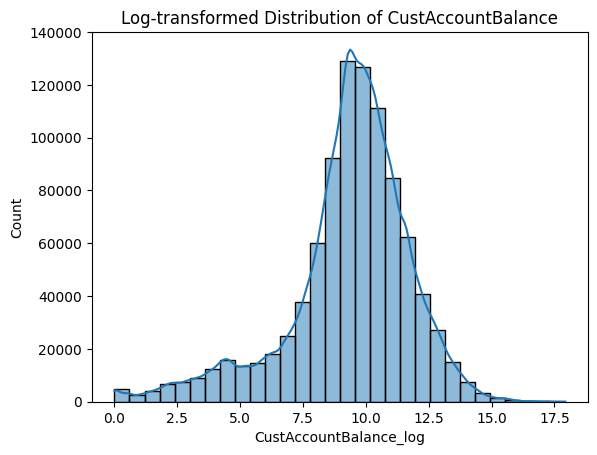

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
df['CustAccountBalance_log'] = np.log1p(df['CustAccountBalance'])

# Visualize the log-transformed distribution
sns.histplot(df['CustAccountBalance_log'], kde=True, bins=30)
plt.title('Log-transformed Distribution of CustAccountBalance')
plt.show()


In [9]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis of the log-transformed data
skewness = skew(df['CustAccountBalance_log'])
kurt = kurtosis(df['CustAccountBalance_log'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: -1.017925661699761
Kurtosis: 1.7090802808005616


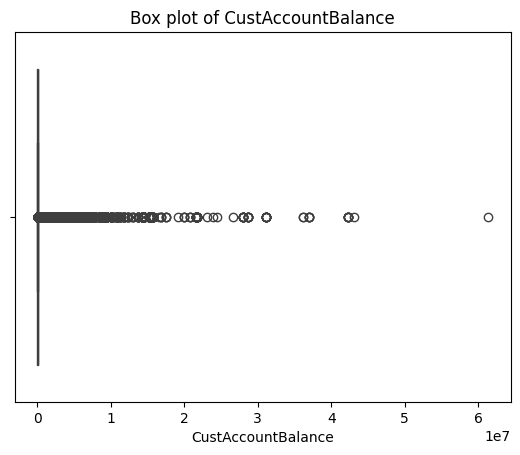

In [10]:
sns.boxplot(x=df['CustAccountBalance'])
plt.title('Box plot of CustAccountBalance')
plt.show()


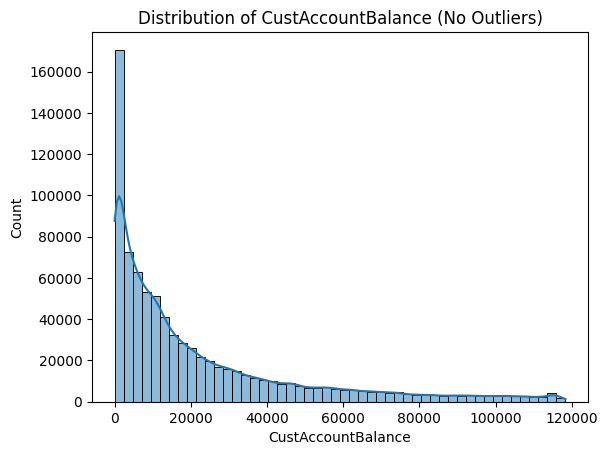

In [11]:
# Identify outliers based on IQR
Q1 = df['CustAccountBalance'].quantile(0.25)
Q3 = df['CustAccountBalance'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['CustAccountBalance'] < (Q1 - 1.5 * IQR)) | (df['CustAccountBalance'] > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outliers]

# Re-plot without outliers
sns.histplot(df_no_outliers['CustAccountBalance'], kde=True, bins=50)
plt.title('Distribution of CustAccountBalance (No Outliers)')
plt.show()


In [12]:
df.isnull().sum()  # To check for missing values


,0
CustGender,0
CustAccountBalance,0
TransactionAmount (INR),0
FrequencyOfPurchasing,0
Age,0
MonthlyTransactionAverage,0
RecencyDays,0
CustomerLifetimeValue,0
LoyaltyScore,0
EstimatedYearlySpending,0


In [13]:
df.columns

Index(['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)',
       'FrequencyOfPurchasing', 'Age', 'MonthlyTransactionAverage',
       'RecencyDays', 'CustomerLifetimeValue', 'LoyaltyScore',
       'EstimatedYearlySpending', 'SavingsPotential', 'SavingsPotentialStatus',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'Lifestyle', 'DebtToIncomeRatio', 'CustAccountBalance_log'],
      dtype='object')

In [14]:
df[df['CustAccountBalance'] == 0][['TransactionAmount (INR)', 'FrequencyOfPurchasing']]


,TransactionAmount (INR),FrequencyOfPurchasing
599,13259.48,5
1844,118.00,3
2536,500.00,5
2922,673.00,5
3276,457.22,1
...,...,...
929289,350.00,4
929451,1920.00,3
929489,403.40,5
929609,1500.00,3


In [15]:
# Check for non-numeric values in the CustAccountBalance column
print(df['CustAccountBalance'].apply(pd.to_numeric, errors='coerce').isna().sum())


0


In [16]:
zero_balance_count = (df['CustAccountBalance'] == 0).sum()
print(f"Number of zero balance customers: {zero_balance_count}")


Number of zero balance customers: 1682


In [17]:
zero_balance_customers = df[df['CustAccountBalance'] == 0]
print(zero_balance_customers.describe())


       CustAccountBalance  TransactionAmount (INR)  FrequencyOfPurchasing  \
count              1682.0              1682.000000            1682.000000   
mean                  0.0              1780.282408               3.004162   
std                   0.0              4584.351571               1.434464   
min                   0.0                 0.000000               1.000000   
25%                   0.0               200.000000               2.000000   
50%                   0.0               501.500000               3.000000   
75%                   0.0              1382.250000               4.000000   
max                   0.0             82450.000000               5.000000   

               Age  MonthlyTransactionAverage  RecencyDays  \
count  1682.000000                1682.000000  1682.000000   
mean     24.519620                 792.005092    35.998216   
std       5.136556                2167.964202    14.680678   
min      15.000000                   0.000000   -21.000000

In [18]:
outliers = df[(df['CustAccountBalance'] == 0) &
              ((df['TransactionAmount (INR)'] > 50000) |
               (df['MonthlyTransactionAverage'] > 20000) |
               (df['CustomerLifetimeValue'] > 1000000))]
print(outliers)


       CustGender  CustAccountBalance  TransactionAmount (INR)  \
599             M                 0.0                 13259.48   
12563           F                 0.0                  9655.00   
63430           M                 0.0                  4945.00   
91174           M                 0.0                 20600.00   
98269           M                 0.0                 15000.00   
...           ...                 ...                      ...   
859404          M                 0.0                  4370.00   
859844          M                 0.0                  8840.00   
885488          M                 0.0                 20185.00   
911311          M                 0.0                  4787.00   
919245          F                 0.0                  5927.64   

        FrequencyOfPurchasing  Age  MonthlyTransactionAverage  RecencyDays  \
599                         5   21                2651.896000          -21   
12563                       3   22                3

In [19]:
import pandas as pd

# Assuming your DataFrame is named df

# Step 1: Identify rows where CustAccountBalance is 0 and other columns have legitimate values
# Define what you consider as legitimate values for the other columns (e.g., non-zero or within a reasonable range)
legitimate_rows = df[(df['CustAccountBalance'] == 0) &
                     (df['TransactionAmount (INR)'] > 0) &
                     (df['FrequencyOfPurchasing'] > 0) &
                     (df['Age'] > 0) &
                     (df['MonthlyTransactionAverage'] > 0) &
                     (df['RecencyDays'] < 0)]  # Adjust conditions based on your data

# Step 2: Calculate the median of the CustAccountBalance column
median_balance = df['CustAccountBalance'].median()

# Step 3: Replace CustAccountBalance with the median where the conditions hold
df.loc[legitimate_rows.index, 'CustAccountBalance'] = median_balance

# Step 4: Verify the changes
print(f"Updated count of zero balance: {df[df['CustAccountBalance'] == 0].shape[0]}")


Updated count of zero balance: 1677


In [20]:
# Step 1: Handling Negative RecencyDays
# Remove rows with negative RecencyDays
df_cleaned = df[df['RecencyDays'] >= 0]

# Alternatively, you can replace negative values with a valid value, such as the minimum or median RecencyDays
# df_cleaned['RecencyDays'] = df_cleaned['RecencyDays'].apply(lambda x: 0 if x < 0 else x)

# Check the results
df_cleaned['RecencyDays'].describe()


,RecencyDays
count,929353.000000
mean,36.038535
std,14.799305
min,0.000000
25%,24.000000
50%,36.000000
75%,49.000000
max,60.000000


In [21]:
# Step 2: Investigate and Handle Transaction Amount and Frequency
# First, check the distribution of TransactionAmount and FrequencyOfPurchasing for rows where CustAccountBalance is 0
zero_balance_data = df_cleaned[df_cleaned['CustAccountBalance'] == 0]

# Transaction Amount (INR)
print(zero_balance_data['TransactionAmount (INR)'].describe())

# Frequency of Purchasing
print(zero_balance_data['FrequencyOfPurchasing'].describe())

# Check if the transaction amounts and frequencies for customers with zero balances make sense
# If necessary, filter out unreasonable outliers (for example, very high transaction amounts for zero balance)
# We'll remove rows where transaction amounts are above a certain threshold (e.g., 10,000 INR) for customers with zero balance
df_cleaned = df_cleaned[~((df_cleaned['CustAccountBalance'] == 0) & (df_cleaned['TransactionAmount (INR)'] > 10000))]

# Alternatively, you can apply different thresholds for transaction amounts and frequency of purchasing
# Check the cleaned dataset
df_cleaned['TransactionAmount (INR)'].describe()
df_cleaned['FrequencyOfPurchasing'].describe()


count     1677.000000
mean      1776.641210
std       4582.132497
min          0.000000
25%        200.000000
50%        503.000000
75%       1383.000000
max      82450.000000
Name: TransactionAmount (INR), dtype: float64
count    1677.000000
mean        3.001789
std         1.433280
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: FrequencyOfPurchasing, dtype: float64


,FrequencyOfPurchasing
count,929293.000000
mean,2.999038
std,1.415026
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [22]:
# Check the number of zero balance rows after previous cleaning
zero_balance_rows = df_cleaned[df_cleaned['CustAccountBalance'] == 0]

# Show the number of rows and some key stats to understand if they still have high transaction amounts
print(f"Number of zero balance rows: {len(zero_balance_rows)}")
print(zero_balance_rows['TransactionAmount (INR)'].describe())

# Optionally, you can check the distribution of CustAccountBalance for the cleaned data
print(df_cleaned['CustAccountBalance'].describe())

# Investigate if the high values of CustAccountBalance are still causing issues


Number of zero balance rows: 1617
count     1617.000000
mean      1092.999202
std       1615.474896
min          0.000000
25%        198.000000
50%        500.000000
75%       1207.000000
max      10000.000000
Name: TransactionAmount (INR), dtype: float64
count    9.292930e+05
mean     8.761580e+04
std      4.542614e+05
min      0.000000e+00
25%      4.398500e+03
50%      1.524162e+04
75%      4.997819e+04
max      6.138221e+07
Name: CustAccountBalance, dtype: float64


In [23]:
# Step 4: Investigate and Handle Extreme Values in CustomerLifetimeValue and SavingsPotential
# Check for extreme negative values in CustomerLifetimeValue and SavingsPotential
extreme_values = df_cleaned[(df_cleaned['CustomerLifetimeValue'] < 0) | (df_cleaned['SavingsPotential'] < 0)]

# Get the summary of extreme values
print(extreme_values[['CustomerLifetimeValue', 'SavingsPotential']].describe())

# We can either:
# 1. Remove rows with extreme negative values (if they are errors or missing data)
df_cleaned = df_cleaned[~((df_cleaned['CustomerLifetimeValue'] < 0) | (df_cleaned['SavingsPotential'] < 0))]

# 2. Or, replace negative values with a suitable value like 0 or the median for that column
# Example: Replacing negative CustomerLifetimeValue with the median
df_cleaned['CustomerLifetimeValue'] = df_cleaned['CustomerLifetimeValue'].apply(lambda x: max(x, 0))

# Check the updated data
print(df_cleaned[['CustomerLifetimeValue', 'SavingsPotential']].describe())


       CustomerLifetimeValue  SavingsPotential
count           1.850830e+05      1.850830e+05
mean            5.092244e+05     -1.316937e+04
std             2.206707e+06      7.216481e+04
min             6.400000e-01     -1.646137e+07
25%             3.239564e+04     -8.022165e+03
50%             1.143687e+05     -2.333860e+03
75%             3.697362e+05     -6.288150e+02
max             4.499796e+08     -4.000000e-03
       CustomerLifetimeValue  SavingsPotential
count           7.442100e+05      7.442100e+05
mean            2.363214e+05      1.034261e+05
std             7.753150e+05      5.020453e+05
min             0.000000e+00      0.000000e+00
25%             3.469484e+04      6.525625e+03
50%             8.575608e+04      1.899121e+04
75%             2.123924e+05      6.112583e+04
max             3.054113e+08      5.269275e+07


In [24]:
anomalies = df[(df['CustAccountBalance'] == 0) &
               ((df['TransactionAmount (INR)'] > 0) |
                (df['FrequencyOfPurchasing'] > 0) |
                (df['RecencyDays'] < 0))]
anomalies.describe()


,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,EstimatedYearlySpending,SavingsPotential,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,DebtToIncomeRatio,CustAccountBalance_log
count,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1.677000e+03,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0
mean,0.0,1776.641210,3.001789,24.509839,792.349144,36.168157,2.590995e+05,0.0,9508.189729,-9508.189729,0.036345,0.600358,0.000574,0.194818,0.036520,0.0
std,0.0,4582.132497,1.433280,5.134764,2170.501765,14.368168,6.975005e+05,0.0,26046.021180,26046.021180,0.045194,0.286656,0.001573,0.087671,0.002030,0.0
min,0.0,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,-482472.000000,0.016393,0.200000,0.000000,0.066590,0.000000,0.0
25%,0.0,200.000000,2.000000,22.000000,66.500000,25.000000,2.170000e+04,0.0,798.000000,-7002.120000,0.020408,0.400000,0.000048,0.128525,0.035294,0.0
50%,0.0,503.000000,3.000000,22.000000,200.000000,36.000000,6.600000e+04,0.0,2400.000000,-2400.000000,0.027027,0.600000,0.000145,0.190572,0.036474,0.0
75%,0.0,1383.000000,4.000000,29.000000,583.510000,48.000000,1.907740e+05,0.0,7002.120000,-798.000000,0.038462,0.800000,0.000423,0.258206,0.037855,0.0
max,0.0,82450.000000,5.000000,34.000000,40206.000000,60.000000,1.238345e+07,0.0,482472.000000,0.000000,1.000000,1.000000,0.029135,0.580080,0.039344,0.0


In [25]:
# Step 5: Handle Extreme Transaction Amount (INR)
# Set a threshold for maximum allowable transaction amount (e.g., 100,000 INR)
threshold = 100000

# Option 1: Remove rows with transaction amounts greater than the threshold
df_cleaned = df_cleaned[df_cleaned['TransactionAmount (INR)'] <= threshold]

# Option 2: Cap transaction amounts greater than the threshold to the threshold value
# df_cleaned['TransactionAmount (INR)'] = df_cleaned['TransactionAmount (INR)'].apply(lambda x: min(x, threshold))

# Check the updated data
print(df_cleaned['TransactionAmount (INR)'].describe())


count    744164.000000
mean        942.686805
std        2558.924840
min           0.000000
25%         130.000000
50%         350.000000
75%         949.500000
max      100000.000000
Name: TransactionAmount (INR), dtype: float64


In [26]:
# Handling Customer Lifetime Value (CLV)
df_cleaned['CustomerLifetimeValue'] = df_cleaned['CustomerLifetimeValue'].apply(
    lambda x: df_cleaned['CustomerLifetimeValue'].median() if x < 0 else x)

# Check the updated data for CustomerLifetimeValue
print(df_cleaned['CustomerLifetimeValue'].describe())


count    7.441640e+05
mean     2.349554e+05
std      6.766003e+05
min      0.000000e+00
25%      3.469268e+04
50%      8.574568e+04
75%      2.123486e+05
max      4.339348e+07
Name: CustomerLifetimeValue, dtype: float64


In [27]:
# Handling RecencyDays: Replace negative values with the median
df_cleaned['RecencyDays'] = df_cleaned['RecencyDays'].apply(
    lambda x: df_cleaned['RecencyDays'].median() if x < 0 else x)

# Check the updated data for RecencyDays
print(df_cleaned['RecencyDays'].describe())


count    744164.000000
mean         35.859340
std          14.810865
min           0.000000
25%          24.000000
50%          36.000000
75%          49.000000
max          60.000000
Name: RecencyDays, dtype: float64


In [28]:
df_cleaned.describe()

,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,EstimatedYearlySpending,SavingsPotential,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,DebtToIncomeRatio,CustAccountBalance_log
count,7.441640e+05,744164.000000,744164.000000,744164.000000,744164.000000,744164.000000,7.441640e+05,7.441640e+05,7.441640e+05,7.441640e+05,744164.000000,744164.000000,744164.000000,744164.000000,744164.000000,744164.000000
mean,1.079039e+05,942.686805,3.091980,24.745720,386.150759,35.859340,2.349554e+05,8.361986e+02,4.633809e+03,1.032701e+05,0.038138,0.618396,0.000280,0.200858,0.021716,10.116457
std,4.999079e+05,2558.924840,1.397847,5.950103,1164.178548,14.810865,6.766003e+05,4.014800e+04,1.397014e+04,4.979202e+05,0.052861,0.279569,0.000844,0.086410,0.010578,1.618993
min,0.000000e+00,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.016393,0.200000,0.000000,0.066557,0.000000,0.000000
25%,8.903510e+03,130.000000,2.000000,20.000000,48.652500,24.000000,3.469268e+04,2.226000e+01,5.838300e+02,6.525419e+03,0.020000,0.400000,0.000035,0.129549,0.013158,9.094313
50%,2.258809e+04,350.000000,3.000000,23.000000,128.689750,36.000000,8.574568e+04,6.356000e+01,1.544277e+03,1.898941e+04,0.027027,0.600000,0.000093,0.193819,0.023987,10.025222
75%,6.699180e+04,949.500000,4.000000,31.000000,350.000000,49.000000,2.123486e+05,2.057800e+02,4.200000e+03,6.111558e+04,0.040000,0.800000,0.000254,0.260009,0.031033,11.112340
max,4.316556e+07,100000.000000,5.000000,34.000000,100000.000000,60.000000,4.339348e+07,2.438334e+07,1.200000e+06,4.316487e+07,1.000000,1.000000,0.072464,0.704348,0.037854,17.580553


In [29]:
# Step 1: Count the number of zero balance customers
zero_balance_count = df_cleaned[df_cleaned['CustAccountBalance'] == 0].shape[0]
print(f"Number of zero balance customers: {zero_balance_count}")

# Step 2: Define the ranges for account balances
bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, float('inf')]
labels = ['0-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']

# Step 3: Categorize customers into these ranges
df_cleaned['AccountBalanceRange'] = pd.cut(df_cleaned['CustAccountBalance'], bins=bins, labels=labels)

# Step 4: Count the number of customers in each range
account_balance_distribution = df_cleaned['AccountBalanceRange'].value_counts().sort_index()

# Step 5: Display the results
print("\nCustomer distribution across account balance ranges:")
print(account_balance_distribution)

# Optional: Print a summary of customers in zero balance separately
print(f"\nZero balance customers in each range: {zero_balance_count}")


Number of zero balance customers: 2

Customer distribution across account balance ranges:
AccountBalanceRange
0-10K        207329
10K-50K      307691
50K-100K      90334
100K-500K    109885
500K-1M       16970
1M-5M         10728
5M-10M          982
10M+            243
Name: count, dtype: int64

Zero balance customers in each range: 2


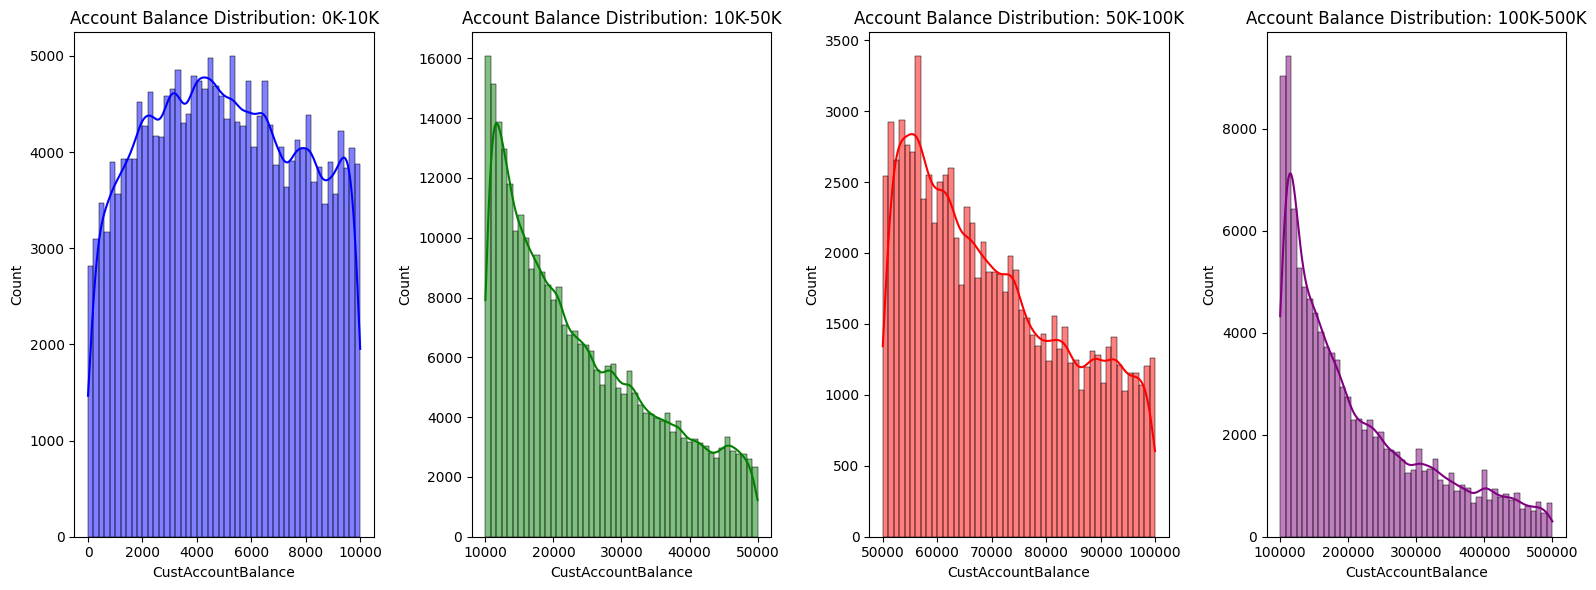

Number of customers in the 0K-10K range: 207304
Number of customers in the 10K-50K range: 307718
Number of customers in the 50K-100K range: 90332
Number of customers in the 100K-500K range: 109887

Summary statistics for 0K-10K range:
count    207304.000000
mean       5020.295452
std        2768.096371
min           0.000000
25%        2721.040000
50%        4955.160000
75%        7344.435000
max        9999.280000
Name: CustAccountBalance, dtype: float64

Summary statistics for 10K-50K range:
count    307718.000000
mean      23996.355883
std       10976.249175
min       10000.000000
25%       14534.060000
50%       21306.700000
75%       31740.100000
max       49999.090000
Name: CustAccountBalance, dtype: float64

Summary statistics for 50K-100K range:
count    90332.000000
mean     70467.212223
std      14158.732903
min      50000.230000
25%      58086.640000
50%      68122.250000
75%      81618.440000
max      99991.600000
Name: CustAccountBalance, dtype: float64

Summary statistics

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the four ranges (including 0-10K)
range_0k_10k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 0) & (df_cleaned['CustAccountBalance'] < 10000)]
range_10k_50k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 10000) & (df_cleaned['CustAccountBalance'] < 50000)]
range_50k_100k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 50000) & (df_cleaned['CustAccountBalance'] < 100000)]
range_100k_500k = df_cleaned[(df_cleaned['CustAccountBalance'] >= 100000) & (df_cleaned['CustAccountBalance'] < 500000)]

# Plot the distribution of CustAccountBalance within these ranges
plt.figure(figsize=(16, 6))

# Plot for 0K-10K range
plt.subplot(1, 4, 1)
sns.histplot(range_0k_10k['CustAccountBalance'], kde=True, bins=50, color='blue')
plt.title('Account Balance Distribution: 0K-10K')

# Plot for 10K-50K range
plt.subplot(1, 4, 2)
sns.histplot(range_10k_50k['CustAccountBalance'], kde=True, bins=50, color='green')
plt.title('Account Balance Distribution: 10K-50K')

# Plot for 50K-100K range
plt.subplot(1, 4, 3)
sns.histplot(range_50k_100k['CustAccountBalance'], kde=True, bins=50, color='red')
plt.title('Account Balance Distribution: 50K-100K')

# Plot for 100K-500K range
plt.subplot(1, 4, 4)
sns.histplot(range_100k_500k['CustAccountBalance'], kde=True, bins=50, color='purple')
plt.title('Account Balance Distribution: 100K-500K')

plt.tight_layout()
plt.show()

# Check the number of customers in each range
print("Number of customers in the 0K-10K range:", len(range_0k_10k))
print("Number of customers in the 10K-50K range:", len(range_10k_50k))
print("Number of customers in the 50K-100K range:", len(range_50k_100k))
print("Number of customers in the 100K-500K range:", len(range_100k_500k))

# Check summary statistics for these ranges
print("\nSummary statistics for 0K-10K range:")
print(range_0k_10k['CustAccountBalance'].describe())

print("\nSummary statistics for 10K-50K range:")
print(range_10k_50k['CustAccountBalance'].describe())

print("\nSummary statistics for 50K-100K range:")
print(range_50k_100k['CustAccountBalance'].describe())

print("\nSummary statistics for 100K-500K range:")
print(range_100k_500k['CustAccountBalance'].describe())


In [31]:
# Count the number of customers with zero balance
zero_balance_customers = df_cleaned[df_cleaned['CustAccountBalance'] == 0]

# Display the number of customers with zero balance
print(f"Number of customers with zero balance: {len(zero_balance_customers)}")


Number of customers with zero balance: 2


In [32]:
# Check for missing or NaN values in the 'CustAccountBalance' column
missing_values_count = df_cleaned['CustAccountBalance'].isna().sum()
print(f"Number of missing or NaN values in CustAccountBalance: {missing_values_count}")


Number of missing or NaN values in CustAccountBalance: 0


In [33]:
df_cleaned.to_csv('Cleaned_data_acc_balance.csv')